<a href="https://colab.research.google.com/github/pandey-rakshit/almabetter/blob/main/Module2/DS201/Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
   - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Dependencies**

contains all the installations, imports and functions that are used in the projects

## **Installation & Imports**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install dask
!pip install retrying

In [ ]:
#import all necessary labraries

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

from dask import delayed, compute
from retrying import retry

from datetime import datetime
import time

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Fetching URL's**

In [ ]:
# Write Your Code here

# define variable host
host = 'https://www.justwatch.com'

# fetch_url function take the soup as input and return list of urls extracted from the soup
def fetch_url(soup, limit=50):
  # find all the anchor tag 'a' that has class attribute 'title-list-grid__item--link'
  list_container = soup.findAll('a', class_='title-list-grid__item--link')
  # extract and return list of urls
  return [host + movie['href'] for movie in list_container][:limit]


## **Scrapping Title**

In [ ]:
# Write Your Code here

# Scrape title function take the soup as input and return the title
def scrape_title(soup):
  title_block = soup.find('div', class_='title-block') # soup.find() -> find div that has class attribute = 'title-block'
  title = None
  # check if title block have some value or its none
  if title_block:
    title = title_block.div.h1.text.strip()  # extract the title from title block
  return title # return title


## **Scrapping Year**

In [ ]:
# Write Your Code here

# scrape release year function take soup as input and return year of release
def scrape_release_year(soup):
  # find the div with class attribute = 'title-block'
  heading = soup.find('div', class_='title-block')
  year = None
  if heading: # check if heading is not none
    year = heading.div.span.get_text().strip()[1:-1]  # extract year from title block
    # heading = (year)[1:-1]
    # [1: -1] => is removing brackets from heading returning 'year'
  return year # return year

## **Scrapping Genres**

In [ ]:
# Write Your Code here

# scrapping Genres function take soup as input and return genres
def scrape_genres(soup):
  # find the h3 tag that has string ='Genres'
  container = soup.find('h3', string="Genres")
  genre = None
  if container and container.next_sibling: # check if h3 and its next sibling is present or its not none

    #  <parent>
    #      <child1></child1>
    #      <child2></child2>
    #  </parent>
    # child 1 and child 2 are sibling
    # assume child1 is h3 and has string Genres then container.next_sibling will return child2

    genre = container.next_sibling.get_text().strip() # extract genre from next sibling
  return genre # return genre

## **Scrapping IMDB Rating**

In [ ]:
# Write Your Code here

# scrape Imdb rating function take soup as input and return IMDB rating

def scrape_IMDB_rating(soup):
  # find h3 tag that has string = 'Rating'
  container = soup.find('h3', string="Rating")
  rating = None
  if container: # check if element is present in the soup
    rating = container.next_sibling.get_text().strip().split(" ")[0] or None # extract the IMDB rating and if exists or return none
  return rating # return rating


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here

# scrape duration function take soups as input and return duration or runtime
def scrape_duration(soup):
  # find the h3 element that has string = 'Runtime'
  container = soup.find('h3', string="Runtime")
  duration = None
  if container and container.next_sibling: # check for runtime and its next sibling exists in the soup
    duration = container.next_sibling.get_text().strip() # extract the duration from container and return
  return duration


## **Scrapping Age Rating**

In [ ]:
# Write Your Code here

# Scrape age rating function take soups as input and return Age Rating
def scrape_age_rating(soup):
  # find h3 element that has string = 'Age rating'
  container = soup.find('h3', string="Age rating")
  rating = None
  if container: # check if container exists in the given soup
    rating = container.next_sibling.get_text().strip() # extract Age Rating from next sibling of the container
  return rating # return age rating


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here

# scrape production country function take soups as input and return Production Country
def scrape_production_country(soup):
  # find h3 elements that has string = " Production country "
  container = soup.find('h3', string=" Production country ")
  production_country = None
  if container: # check if container exists in the soup
    production_country = container.next_sibling.get_text().strip() # extract production country and return it
  return production_country

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here


# scrape streaming service details function take soup as input and return streaming services
def scrape_streaming_service_details(soup):
  streaming = None
  # find div that has class attribute = "buybox-row stream" (offer that is related to stream only)
  container = soup.find('div', class_="buybox-row stream")
  # check if container exists in the given soup
  if container:
    # find the stream offers from container
    stream_offer = container.find(class_="buybox-row__offers")
    # find all the streaming services icons (img)
    stream_offer_img = stream_offer.find_all(class_="offer__icon")
    # extract alt attribute from streaming services icons
    streaming = [img['alt'] for img in stream_offer_img]
    # joining all elements in the streaming list by comma(,) | casting array to string by joining element and sperated by comma
    streaming = ', '.join(streaming)
  return streaming # return streaming services

## **Scrape Details**

- Title
- Release Year
- Genres
- Rating
- Durations
- Age Rating
- Produciton Country
- Streaming Services

In [ ]:
# decorated function by delayed and retry
# delayed is used by dask for parallel computing
# retry is used to retry if some error has occured
# scrape details function take url and scrape all the requried data using above listed function and finaly return data Dictionary

@delayed
@retry(wait_fixed=5000, stop_max_attempt_number=3)
def scrape__details(url):
    data = {}
    data['url'] = url

    try:
      # requesting data Sending an HTTP GET request to the URL
      response = requests.get(url)
      # printing response status code for url
      print(f"Response Status Code for {url} is: {response.status_code}")
      # checking is status code is 200 then proceed to scrape data else retry or raise exception
      if response.status_code == 200:
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(response.text, 'html.parser')

        # Scraping Title, Release year, Genres, Rating, Duration, Age Rating, Production Country, and Streaming Services using above defined function
        # Storing all the result in the data dictionary
        data['Title'] = scrape_title(soup)
        data['Release Year'] = scrape_release_year(soup)
        data['Genres'] = scrape_genres(soup)
        data['Rating'] = scrape_IMDB_rating(soup)
        data['Duration'] = scrape_duration(soup)
        data['Age Rating'] = scrape_age_rating(soup)
        data['Production Country'] = scrape_production_country(soup)
        data['Streaming Services'] = scrape_streaming_service_details(soup)

        return data # returning the data dictionary

      elif response.status_code == 429:  # checking if the request is blocked by the server for retrying
          print(f"429 - Too Many Requests for {url}, retrying...")
          raise Exception("429 - Too Many Requests")
    except Exception as e:
      print(f"Request Exception: {e}")
      time.sleep(60) # waiting for 60 seconds or 1 minutes and continuing the request again after that
      raise


# scrape__data function takes the list of urls and perform parallel execution using dask
# return the finaly scrape data
def scrape__data(urls):
    delayed_fetch = [delayed(scrape__details)(url) for url in urls]
    final_scrape_data = compute(*delayed_fetch)
    return final_scrape_data


# **Start The Project**

## **Task 1:- Web Scrapping**


In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Scrapping Movies Data**

In [ ]:
# fetch all urls from the soup using fetch_url function from dependencies
movies_urls = fetch_url(soup)
# printing length of movies_url and movies url
print(f"movies_urls size: {len(movies_urls)} \nmovies_urls: {movies_urls}")

# scrape data of all these urls  using scrape__data function from dependencies
scrape_movie_data = scrape__data(movies_urls)
scrape_movie_data

movies_urls size: 50 
movies_urls: ['https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'https://www.justwatch.com/in/movie/premalu', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/article-370', 'https://www.justwatch.com/in/movie/anatomie-dune-chute', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/fighter-2022', 'https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatch.com/in/movie/amar-singh-chamkila', 'https://www.justwatch.com/in/movie/laapataa-ladies', 'https://www.justwatch.com/in/movie/dune-2021', 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire', 'https://www.justwatch.com/in/movie/12th-fail', 'https://www.justwatch.com/in/movie/bramayugam'

({'url': 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
  'Title': 'Teri Baaton Mein Aisa Uljha Jiya',
  'Release Year': '2024',
  'Genres': 'Romance, Science-Fiction, Comedy, Drama',
  'Rating': '6.4',
  'Duration': '2h 21min',
  'Age Rating': None,
  'Production Country': 'India',
  'Streaming Services': 'Amazon Prime Video'},
 {'url': 'https://www.justwatch.com/in/movie/premalu',
  'Title': 'Premalu',
  'Release Year': '2024',
  'Genres': 'Comedy, Romance',
  'Rating': '8.0',
  'Duration': '2h 36min',
  'Age Rating': 'U',
  'Production Country': 'India',
  'Streaming Services': 'aha'},
 {'url': 'https://www.justwatch.com/in/movie/hanu-man',
  'Title': 'Hanu-Man',
  'Release Year': '2024',
  'Genres': 'Action & Adventure, Comedy, Science-Fiction, Fantasy',
  'Rating': '7.9',
  'Duration': '2h 39min',
  'Age Rating': 'UA',
  'Production Country': 'India',
  'Streaming Services': 'Jio Cinema, Zee5'},
 {'url': 'https://www.justwatch.com/in/movie/article-37

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here

# setting pandas options of max_colums and max_rows to none so that can view all the columns and rows in the data for testing purpose
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)


# converting scrape_movie_data dictionary to pandas DataFrame
movie_df = pd.DataFrame(scrape_movie_data)
movie_df.head()


,url,Title,Release Year,Genres,Rating,Duration,Age Rating,Production Country,Streaming Services
0,https://www.justwatch.com/in/movie/untitled-sh...,Teri Baaton Mein Aisa Uljha Jiya,2024,"Romance, Science-Fiction, Comedy, Drama",6.4,2h 21min,None,India,Amazon Prime Video
1,https://www.justwatch.com/in/movie/premalu,Premalu,2024,"Comedy, Romance",8.0,2h 36min,U,India,aha
2,https://www.justwatch.com/in/movie/hanu-man,Hanu-Man,2024,"Action & Adventure, Comedy, Science-Fiction, F...",7.9,2h 39min,UA,India,"Jio Cinema, Zee5"
3,https://www.justwatch.com/in/movie/article-370,Article 370,2024,"Action & Adventure, Drama, Mystery & Thriller",8.1,2h 38min,UA,India,Netflix
4,https://www.justwatch.com/in/movie/anatomie-du...,Anatomy of a Fall,2023,"Mystery & Thriller, Crime, Drama",7.7,2h 32min,None,France,Amazon Prime Video


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# wait for 60 seconds before requesting
time.sleep(60)

# Sending an HTTP GET request to the URL
page=requests.get(tv_url)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')

# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
# fetching tv shows url using fetch_url funciton from dependencies
tv_show_url = fetch_url(soup)
tv_show_url

['https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/fallout',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/3-body-problem',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/inspector-rishi',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/ripley',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project',
 'https://www.justwatch.com/in/tv-show/a-gentleman-in-moscow',
 'https://www.justwatch.com/in/tv-show/solo-leveling-2024',
 'https://www.justwatch.com/in/tv-show/the-gentlemen',
 'https://www.justwatch.com/in/tv-show/sunflower-2021',
 'https://www.justwatch.com/in/tv-show/young-sheldon',
 'https://www.justwatch.com/in/tv-show/mastram',
 'https://www.justwatch.com/in/tv-show/parasyte-the-grey

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here

# scraping tv shows data using scrape__data function from dependencies
scrape_tv_data = scrape__data(tv_show_url) # scraping data for tv_shows url
scrape_tv_data


Response Status Code for https://www.justwatch.com/in/tv-show/invincible is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/inspector-rishi is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/farzi is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/apharan is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/sunflower-2021 is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/parasyte-the-grey is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/lucifer is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/sugar is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/lootere is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/panchayat is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/mastram is: 200
Response Status Code for https://www.justwatch.com/in/tv-show/maamla-legal-hai is: 200
Response Status Code for http

({'url': 'https://www.justwatch.com/in/tv-show/shogun-2024',
  'Title': 'Shōgun',
  'Release Year': '2024',
  'Genres': 'War & Military, Drama, History',
  'Rating': '8.9',
  'Duration': '59min',
  'Age Rating': None,
  'Production Country': 'United States',
  'Streaming Services': 'Hotstar'},
 {'url': 'https://www.justwatch.com/in/tv-show/fallout',
  'Title': 'Fallout',
  'Release Year': '2024',
  'Genres': 'Action & Adventure, Drama, Science-Fiction, War & Military, Comedy',
  'Rating': '8.6',
  'Duration': '59min',
  'Age Rating': 'A',
  'Production Country': 'United States',
  'Streaming Services': 'Amazon Prime Video'},
 {'url': 'https://www.justwatch.com/in/tv-show/mirzapur',
  'Title': 'Mirzapur',
  'Release Year': '2018',
  'Genres': 'Crime, Action & Adventure, Drama, Mystery & Thriller',
  'Rating': '8.5',
  'Duration': '50min',
  'Age Rating': None,
  'Production Country': 'India',
  'Streaming Services': 'Amazon Prime Video'},
 {'url': 'https://www.justwatch.com/in/tv-show/3

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here

tv_df = pd.DataFrame(scrape_tv_data) # creating Pandas DataFrame
tv_df.head() # Displays first 5 rows of DataFrame

,url,Title,Release Year,Genres,Rating,Duration,Age Rating,Production Country,Streaming Services
0,https://www.justwatch.com/in/tv-show/shogun-2024,Shōgun,2024,"War & Military, Drama, History",8.9,59min,None,United States,Hotstar
1,https://www.justwatch.com/in/tv-show/fallout,Fallout,2024,"Action & Adventure, Drama, Science-Fiction, Wa...",8.6,59min,A,United States,Amazon Prime Video
2,https://www.justwatch.com/in/tv-show/mirzapur,Mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,50min,None,India,Amazon Prime Video
3,https://www.justwatch.com/in/tv-show/3-body-pr...,3 Body Problem,2024,"Science-Fiction, Mystery & Thriller, Drama, Fa...",7.6,56min,A,United States,Netflix
4,https://www.justwatch.com/in/tv-show/panchayat,Panchayat,2020,"Drama, Comedy",8.9,33min,None,India,Amazon Prime Video


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here

movie_df.info() # Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   url                 50 non-null     object
 1   Title               50 non-null     object
 2   Release Year        50 non-null     object
 3   Genres              50 non-null     object
 4   Rating              49 non-null     object
 5   Duration            50 non-null     object
 6   Age Rating          32 non-null     object
 7   Production Country  50 non-null     object
 8   Streaming Services  35 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB


In [ ]:
movie_df['Release Year'] = movie_df['Release Year'].astype(int) # casting release year as int
movie_df['Rating'] = movie_df['Rating'].astype(float) # casting rating as float

In [ ]:
movie_df['Duration'] = movie_df['Duration'].apply(pd.Timedelta) # applying pandas Timedelta method to Durations to convert string to time
movie_df.head()

,url,Title,Release Year,Genres,Rating,Duration,Age Rating,Production Country,Streaming Services
0,https://www.justwatch.com/in/movie/untitled-sh...,Teri Baaton Mein Aisa Uljha Jiya,2024,"Romance, Science-Fiction, Comedy, Drama",6.4,0 days 02:21:00,None,India,Amazon Prime Video
1,https://www.justwatch.com/in/movie/premalu,Premalu,2024,"Comedy, Romance",8.0,0 days 02:36:00,U,India,aha
2,https://www.justwatch.com/in/movie/hanu-man,Hanu-Man,2024,"Action & Adventure, Comedy, Science-Fiction, F...",7.9,0 days 02:39:00,UA,India,"Jio Cinema, Zee5"
3,https://www.justwatch.com/in/movie/article-370,Article 370,2024,"Action & Adventure, Drama, Mystery & Thriller",8.1,0 days 02:38:00,UA,India,Netflix
4,https://www.justwatch.com/in/movie/anatomie-du...,Anatomy of a Fall,2023,"Mystery & Thriller, Crime, Drama",7.7,0 days 02:32:00,None,France,Amazon Prime Video


In [ ]:
tv_df.info() # Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   url                 50 non-null     object
 1   Title               50 non-null     object
 2   Release Year        50 non-null     object
 3   Genres              50 non-null     object
 4   Rating              49 non-null     object
 5   Duration            50 non-null     object
 6   Age Rating          18 non-null     object
 7   Production Country  50 non-null     object
 8   Streaming Services  46 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB


In [ ]:
tv_df['Release Year'] = tv_df['Release Year'].astype(int) # casting release year as int
tv_df['Rating'] = tv_df['Rating'].astype(float) # casting rating as float

In [ ]:
# applying pandas Timedelta method to Durations to convert string to time

tv_df['Duration'] = tv_df['Duration'].apply(pd.Timedelta)
movie_df.head()

,url,Title,Release Year,Genres,Rating,Duration,Age Rating,Production Country,Streaming Services
0,https://www.justwatch.com/in/movie/untitled-sh...,Teri Baaton Mein Aisa Uljha Jiya,2024,"Romance, Science-Fiction, Comedy, Drama",6.4,0 days 02:21:00,None,India,Amazon Prime Video
1,https://www.justwatch.com/in/movie/premalu,Premalu,2024,"Comedy, Romance",8.0,0 days 02:36:00,U,India,aha
2,https://www.justwatch.com/in/movie/hanu-man,Hanu-Man,2024,"Action & Adventure, Comedy, Science-Fiction, F...",7.9,0 days 02:39:00,UA,India,"Jio Cinema, Zee5"
3,https://www.justwatch.com/in/movie/article-370,Article 370,2024,"Action & Adventure, Drama, Mystery & Thriller",8.1,0 days 02:38:00,UA,India,Netflix
4,https://www.justwatch.com/in/movie/anatomie-du...,Anatomy of a Fall,2023,"Mystery & Thriller, Crime, Drama",7.7,0 days 02:32:00,None,France,Amazon Prime Video


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here

# calculating mean of imdb ratings for both movies and tv Shows

imdb_rating_mean_for_moive = movie_df['Rating'].mean()
imdb_rating_mean_for_tv_shows = tv_df['Rating'].mean()
print(f"Mean IMDB Ratings for Movies {round(imdb_rating_mean_for_moive, 3)}, \nMean IMDB Ratings for Tv Shows {round(imdb_rating_mean_for_tv_shows, 3)}")

Mean IMDB Ratings for Movies 6.996, 
Mean IMDB Ratings for Tv Shows 7.943


## Filter movies and TV shows based on specific criteria:
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.

In [ ]:
# Only include movies released in the last 2 years (from the current date).

release_year_from = datetime.today().year - 2
filtered_movie_df = movie_df[movie_df['Release Year'] >= release_year_from]
filtered_movie_df.shape

(44, 9)

In [ ]:
# Only include TV shows released in the last 2 years (from the current date).

filtered_tv_df = tv_df[tv_df['Release Year'] >= release_year_from]
filtered_tv_df.shape

(23, 9)

In [ ]:
# only include movies with an IMDb rating of 7 or higher.

filtered_movie_df = filtered_movie_df[filtered_movie_df['Rating'] >= 7]
filtered_movie_df.shape

(24, 9)

In [ ]:
# Only include TV shows with an IMDb rating of 7 or higher.

filtered_tv_df = filtered_tv_df[filtered_tv_df['Rating'] >= 7]
filtered_tv_df.shape

(20, 9)

In [ ]:
# Write Your Code here
imdb_rating_mean_for_moive = filtered_movie_df['Rating'].mean()
imdb_rating_mean_for_tv_shows = filtered_tv_df['Rating'].mean()
print(f"Mean IMDB Ratings for Movies {round(imdb_rating_mean_for_moive, 3)}, \nMean IMDB Ratings for Tv Shows {round(imdb_rating_mean_for_tv_shows, 3)}")

Mean IMDB Ratings for Movies 7.921, 
Mean IMDB Ratings for Tv Shows 7.825


## **Analyzing Top Genres**

      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.

In [ ]:
# Write Your Code here

# Analyzing Genres for filtered movie
# spliting the genres by comma and expanding that to different columns
movie_genres = filtered_movie_df['Genres'].str.split(', ', expand=True)
# stacking up all the colums and counting all the values
stacked_movie_genres = movie_genres.stack()
genre_movie_counts = stacked_movie_genres.value_counts()
# storing top five movie genre
top_five_movie_genres = genre_movie_counts.head()
top_five_movie_genres

Drama                 20
Comedy                 8
Action & Adventure     7
Mystery & Thriller     7
Romance                5
Name: count, dtype: int64

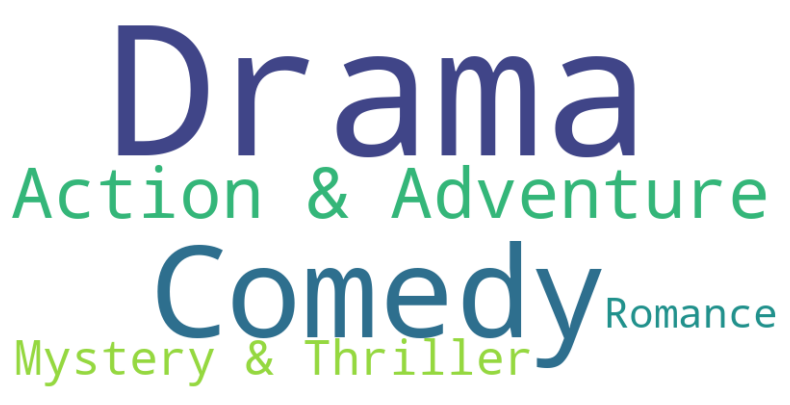

In [ ]:
#Let's Visvalize it using word cloud

# creating wordcloud that has backgroud color white and hight = 400 and width = 800
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(top_five_movie_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Analyzing Genres for filtered tv show
# spliting the genres by comma and expanding that to different columns
tv_genres = filtered_tv_df['Genres'].str.split(', ', expand=True)
# stacking up all the colums and counting all the values
stacked_tv_genres = tv_genres.stack()
genre_tv_counts = stacked_tv_genres.value_counts()
# storing top five tv show genre
top_five_tv_show_genre = genre_tv_counts.head()
top_five_tv_show_genre

Drama                 16
Action & Adventure    11
Science-Fiction        8
Mystery & Thriller     8
Crime                  7
Name: count, dtype: int64

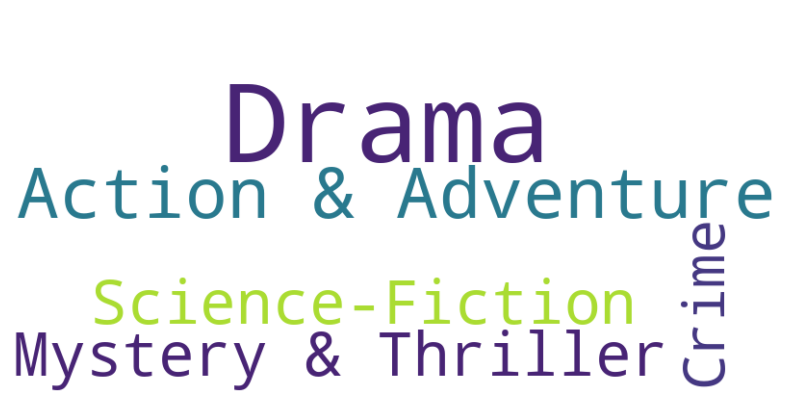

In [ ]:

wordcloud.generate_from_frequencies(top_five_tv_show_genre)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here


movie_streaming_services = filtered_movie_df['Streaming Services'].str.split(', ', expand=True)
stacked_movie_streaming_services = movie_streaming_services.stack()
movie_streaming_services_counts = stacked_movie_streaming_services.value_counts()
top_five_movie_streaming_services = movie_streaming_services_counts.head()
top_five_movie_streaming_services

Netflix               6
Jio Cinema            3
Zee5                  3
Amazon Prime Video    3
aha                   2
Name: count, dtype: int64

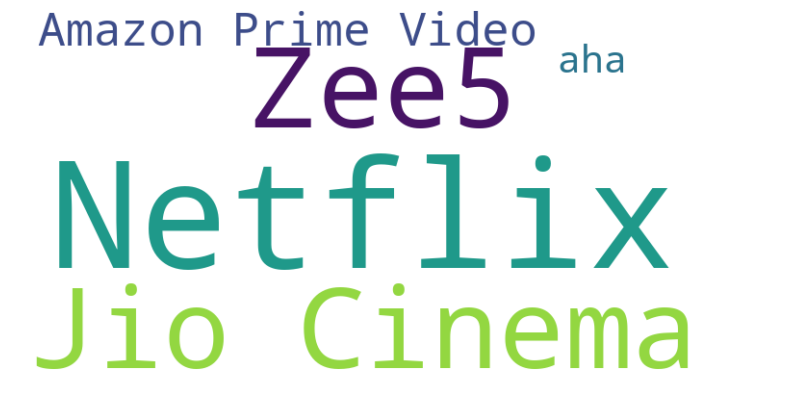

In [ ]:
#Let's Visvalize it using word cloud

wordcloud.generate_from_frequencies(top_five_movie_streaming_services)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
tv_show_streaming_services = filtered_tv_df['Streaming Services'].str.split(', ', expand=True)
stacked_tv_show_streaming_services = tv_show_streaming_services.stack()
tv_show_streaming_services_counts = stacked_tv_show_streaming_services.value_counts()
top_five_tv_show_streaming_services = tv_show_streaming_services_counts.head()
top_five_tv_show_streaming_services


Netflix               9
Amazon Prime Video    4
Hotstar               2
Crunchyroll           1
Apple TV Plus         1
Name: count, dtype: int64

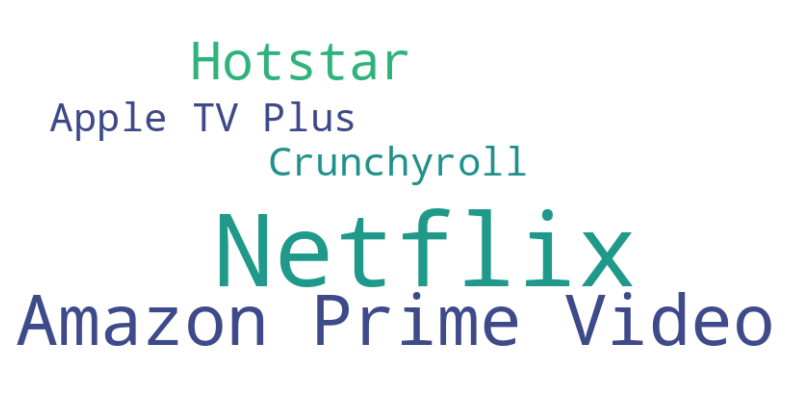

In [ ]:
wordcloud.generate_from_frequencies(top_five_tv_show_streaming_services)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format

# file_name
movie_data = 'Movie.csv'
tv_show_data = 'Tv_Shows.csv'


movie_df.to_csv(path_or_buf=movie_data, mode='w') # df.to_csv() -> pandas dataframe method used to convert dataframe to csv file format
tv_df.to_csv(path_or_buf=tv_show_data, mode='w') # mode = 'w' -> w is used to inform that its a write operation

In [ ]:
#saving filter data as Filter Data in csv format

# file_name
filtered_movie_data = 'Filtered_Movies.csv'
filtered_tv_show_data = 'Filtered_Tv_Shows.csv'

# saving file in csv format in local
filtered_movie_df.to_csv(path_or_buf=filtered_movie_data, mode='w')
filtered_tv_df.to_csv(path_or_buf=filtered_tv_show_data, mode='w')

In [ ]:
# file_name
movie_genres_file = 'Top_Five_Movie_Genre.csv'
tv_show_genres_file = 'Top_Five_Tv_Shows_Genre.csv'
movie_streaming_services_file = 'Top_Five_Movie_Streaming_Services.csv'
tv_shows_streaming_services_file = 'Top_Five_Tv_Shows_Streaming_Services.csv'

# saving file in csv format in local
top_five_movie_genres.to_csv(path_or_buf=movie_genres_file, mode='w')
top_five_tv_show_genre.to_csv(path_or_buf=tv_show_genres_file, mode='w')
top_five_movie_streaming_services.to_csv(path_or_buf=movie_streaming_services_file, mode='w')
top_five_tv_show_streaming_services.to_csv(path_or_buf=tv_shows_streaming_services_file, mode='w')

# **Save in Drive**

In [ ]:
# import drive from google.colab and mount it
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing os
import os

# set path for the drive folder where you want to save all the files
path = '/content/drive/MyDrive/Colab Notebooks/almabetter/Module2/DS201/' # path --> path where file will be stored in drive

if not os.path.exists(path): # if path does not exists then create path using makedirs
    os.makedirs(path)


# file_name
movie_data = path + 'Movie.csv'
tv_show_data = path + 'Tv_Shows.csv'

filtered_movie_data = path + 'Filtered_Movies.csv'
filtered_tv_show_data = path + 'Filtered_Tv_Shows.csv'

# saving file in drive
# df.to_csv is used to convert DataFrame df to CSV file format basically used to exporting the data
movie_df.to_csv(path_or_buf=movie_data, mode='w')
tv_df.to_csv(path_or_buf=tv_show_data, mode='w')
filtered_movie_df.to_csv(path_or_buf=filtered_movie_data, mode='w')
filtered_tv_df.to_csv(path_or_buf=filtered_tv_show_data, mode='w')

In [ ]:
# file_name
movie_genres_file = path + 'Top_Five_Movie_Genre.csv'
tv_show_genres_file = path + 'Top_Five_Tv_Shows_Genre.csv'
movie_streaming_services_file = path + 'Top_Five_Movie_Streaming_Services.csv'
tv_shows_streaming_services_file = path + 'Top_Five_Tv_Shows_Streaming_Services.csv'

# saving file in drive
top_five_movie_genres.to_csv(path_or_buf=movie_genres_file, mode='w')
top_five_tv_show_genre.to_csv(path_or_buf=tv_show_genres_file, mode='w')
top_five_movie_streaming_services.to_csv(path_or_buf=movie_streaming_services_file, mode='w')
top_five_tv_show_streaming_services.to_csv(path_or_buf=tv_shows_streaming_services_file, mode='w')

# **Dataset Drive Link (View Access with Anyone) -**

 https://drive.google.com/drive/folders/1-2vEXUSM_9BJSpdqjDXcvZmyTWsIXjkK?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***